In [1]:
import  pyhf

model = pyhf.simplemodels.hepdata_like([5,10],[50,30],[2,3])
data = [55,33] + model.config.auxdata
parameters = [1.0,1.0,1.0] # nominal parameters

model.logpdf(parameters,data) # evaluate log likelihood

array([-13.60586994])

In [2]:
cls_obs, cls_exp = pyhf.utils.hypotest(1.0,data,model, return_expected_set = True)
cls_obs, cls_exp

(array([0.22800433]), array([[0.00615929],
        [0.02667994],
        [0.10248917],
        [0.31306803],
        [0.65820041]]))

In [83]:
import numpy as np
results = []
poivals = np.linspace(0,5)
for mu in poivals:
    cls_obs, cls_exp = pyhf.utils.hypotest(mu,data,model, return_expected_set = True)
    results.append([ cls_obs[0] ] + [x[0] for x in cls_exp])
    
results = np.asarray(results)
print('Upper Limit (obs): µ = {:0.3}'.format(np.interp(0.05,results[:,0][::-1],poivals[::-1])))
print('Upper Limit (exp): µ = {:0.3}'.format(np.interp(0.05,results[:,3][::-1],poivals[::-1])))

Upper Limit (obs): µ = 1.55
Upper Limit (exp): µ = 1.22


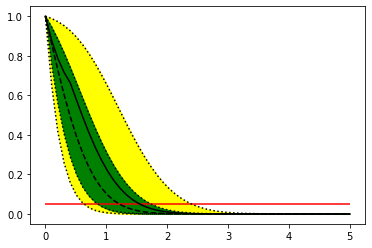

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(poivals,results[:,0], c = 'black')
plt.plot(poivals,results[:,[1,-1]], linestyle = 'dotted', c = 'black')
plt.plot(poivals,results[:,[2,-2]], linestyle = 'dotted', c = 'black')
plt.plot(poivals,results[:,3], linestyle = 'dashed', c = 'black')
plt.fill_between(poivals,results[:,1],results[:,-1], color = 'yellow')
plt.fill_between(poivals,results[:,2],results[:,-2], color = 'green')
plt.hlines(0.05,0,5, color = 'r')

0.10204081632653061